In [1]:
import pandas
import datetime
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from davitpy.models import *
from davitpy import utils
from aacgmv2 import convert_mlt
%matplotlib inline

In [2]:
mapTime = datetime.datetime( 2012, 6, 18, 7 )
vecsTime = datetime.datetime( 2012, 6, 18, 5 )
pltCoords = 'mlt'
cntrPotMin = -50.
cntrPotMax = 5.
cntrLevels = numpy.linspace(cntrPotMin, cntrPotMax, 12, endpoint=True)

In [3]:
potentialDF = pandas.read_csv( "../data/sapsPotentials.txt", sep=' ',\
                    header=None, names=[ "asy", "normMLT", "MLAT", "potential" ] )
potentialDF.head()

,asy,normMLT,MLAT,potential
0,60,-7.0,56.5,-2.44
1,60,-7.0,57.0,-4.78
2,60,-7.0,57.5,-6.92
3,60,-7.0,58.0,-8.67
4,60,-7.0,58.5,-10.24


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


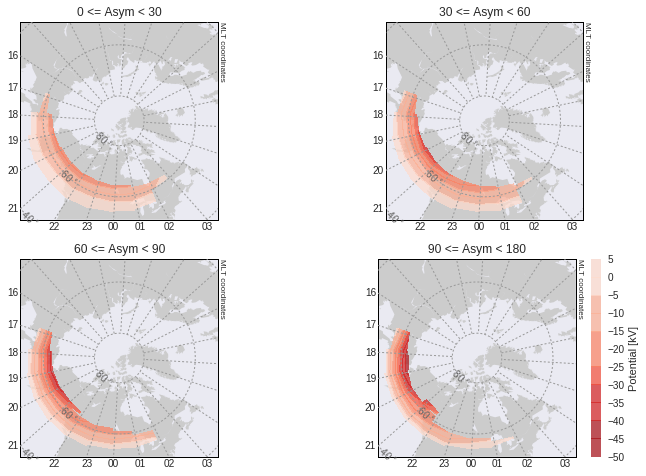

In [4]:
# seaborn color palette
seaMap = ListedColormap(sns.color_palette("Reds_r"))
fig = plt.figure(figsize=(12, 8))
uniqAsyBins = potentialDF["asy"].unique().tolist()
for ind, casy in enumerate( sorted(uniqAsyBins) ):
        currPotDF = potentialDF[ \
                    potentialDF["asy"] == casy ].reset_index(drop=True)
        currPotDF = currPotDF[ ["MLAT", "normMLT",\
                        "potential"] ].pivot( "MLAT", "normMLT" )
        # testDF = testDF.fillna(0.)
        mlatsPot = currPotDF.index.values
        nrmMltsPot = currPotDF.columns.levels[1].values
        mltsPot =[ x if x < 0. else x for x in nrmMltsPot ]
        mlonPots = convert_mlt( mltsPot, vecsTime , m2a=True )
        potVals=currPotDF.values
#         nanLocs = numpy.isnan(potVals)
#         potVals[nanLocs] = 0
        mltsPotCntr, mlatsPotCntr  = numpy.meshgrid( mltsPot, mlatsPot )
        mlonsPotCntr, mlatsPotCntr  = numpy.meshgrid( mlonPots, mlatsPot )
        
        ax = fig.add_subplot(2,2,ind+1)
        m1 = utils.plotUtils.mapObj(boundinglat=50., gridLabels=True,\
                                coords=pltCoords, ax=ax, datetime=mapTime)
        xVec, yVec = m1(mlonsPotCntr, mlatsPotCntr, coords=pltCoords)
        cntrPlt = m1.contourf(xVec, yVec, potVals,cntrLevels,\
            zorder = 5., alpha=0.7,\
            cmap=seaMap, ax=ax);
        if casy <= 90:
            ax.set_title( str(casy-30) + " <= Asym < " + str(casy) )
        else:
            ax.set_title( str(casy-90) + " <= Asym < " + str(casy) )
cbar = plt.colorbar(cntrPlt,ticks=cntrLevels)
cbar.set_clim( cntrPotMin, cntrPotMax )
cbar.ax.set_ylabel('Potential [kV]')
# cntrPlt.clim( cntrPotMin, cntrPotMax )
fig.savefig("../figs/potContrs.pdf",bbox_inches='tight')